In [1]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

In [9]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram
import qiskit.providers.aer.noise as noise
# Error probabilities
res = []
r1=0.00
r2=0.5
while(r1 < r2 ):
    res.append(r1)
    r1 += 0.05
print(res)

for i in range(len(res)):
    prob_1 = prob_2 = float(res[i])
    print(prob_1)
    # Depolarizing quantum errors
    error_1 = noise.depolarizing_error(prob_1, 1)
    error_2 = noise.depolarizing_error(prob_2, 2)
    # Add errors to noise model
    noise_model = noise.NoiseModel()
    noise_model.add_all_qubit_quantum_error(error_1, ['u1', 'u2', 'u3'])
    noise_model.add_all_qubit_quantum_error(error_2, ['cx'])
    print(noise_model)
    # Get basis gates from noise model
    basis_gates = noise_model.basis_gates
    
    from qiskit.tools.monitor import backend_monitor
    from qiskit import *
    from qiskit.visualization import plot_histogram
    from random import randrange, seed, sample
    from sys import argv, exit
    import random
    #data = int(input('ENTER LENGTH OF BIT STREAM (example 5 For 10110):'))
    data=1
    ##########################################################################
    print('|00>')
    h=0
    #h=int(input())
    def bit_stream(p):
        key1 = ""
        for i in range(p):
            temp = str(random.randint(h,h))
            key1 += temp
        return(key1)
    
    bitstream= bit_stream(data)
    digits = [int(x) for x in str(bitstream)]
    ##########################################################################
    #print('List of Bit Stream to transfer over Quantum Channel')
    #print(digits)
    print('\n')
    #n = len(digits)
    n=1
    ##########################################################################
    bob_bits=[]
    from random import choice
    #m=0
    for i in range(n):
        #m=m+10
        #print("No of identity Gate:",m)
        if digits[i] == 0:
            q = QuantumRegister(1, 'q')
            c = ClassicalRegister(1, 'c')
            qc = QuantumCircuit(q, c)
            qc.barrier()
            qc.h(0)
            qc.barrier()
            for j in range(10):
                qc.id(0)
                qc.barrier()
            qc.h(0)
            qc.barrier()
            qc.measure(q[0], c[0])
            #print(qc)
            # Perform a noise simulation
            result = execute(qc, Aer.get_backend('qasm_simulator'),basis_gates=basis_gates,noise_model=noise_model,shots=1000).result()
            counts = result.get_counts(qc)
            plot_histogram(counts)
            #print(qc)
            bits = (result.get_counts(qc))
            print(bits)
            #print(bits)
            #itemMaxValue = max(bits.items(), key=lambda x : x[1])
            #print(itemMaxValue)
            #print(bits.get('0'))
            #print('\n')
            #print("==========================================================")

[0.0, 0.05, 0.1, 0.15000000000000002, 0.2, 0.25, 0.3, 0.35, 0.39999999999999997, 0.44999999999999996, 0.49999999999999994]
0.0
NoiseModel: Ideal
|00>


{'0': 1000}
0.05
NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx', 'u1', 'u2', 'u3']
  Instructions with noise: ['u2', 'u3', 'u1', 'cx']
  All-qubits errors: ['u1', 'u2', 'u3', 'cx']
|00>


{'1': 47, '0': 953}
0.1
NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx', 'u1', 'u2', 'u3']
  Instructions with noise: ['u2', 'u3', 'u1', 'cx']
  All-qubits errors: ['u1', 'u2', 'u3', 'cx']
|00>


{'1': 93, '0': 907}
0.15000000000000002
NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx', 'u1', 'u2', 'u3']
  Instructions with noise: ['u2', 'u3', 'u1', 'cx']
  All-qubits errors: ['u1', 'u2', 'u3', 'cx']
|00>


{'1': 153, '0': 847}
0.2
NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx', 'u1', 'u2', 'u3']
  Instructions with noise: ['u2', 'u3', 'u1', 'cx']
  All-qubits errors: ['u1', 'u2', 'u3', 'cx']
|00>


{'1': 166, '0': 834}
0.25
NoiseModel:
  Ba

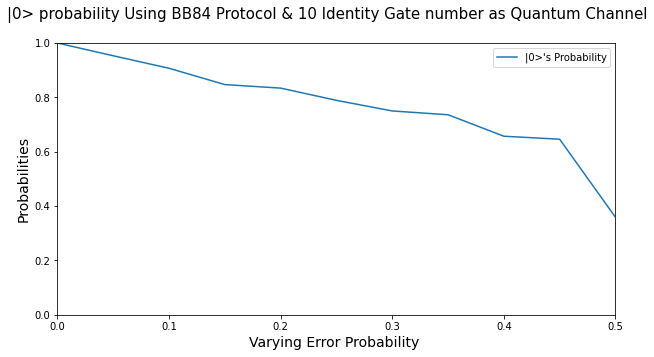

<Figure size 576x360 with 0 Axes>

In [11]:
import matplotlib.pyplot as plt
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
fig, ax = plt.subplots(figsize=(10, 5))
fig.suptitle('|0> probability Using BB84 Protocol & 10 Identity Gate number as Quantum Channel',fontsize=15)
# naming the x axis
plt.xlabel('Varying Error Probability ',fontsize=14)
# naming the y axis
plt.ylabel('Probabilities',fontsize=14)
# giving a title to my graph
# Set axis ranges; by default this will put major ticks every 25.
#ax.set_xlim(0, 300)
#ax.set_ylim(0, 1)
ax.set_xlim(0.0, 0.5)
ax.set_ylim(0., 1)
fig = plt.figure(figsize=(8,5))
# line 2 points
y2 = [1.000,0.953,0.907,0.847,0.834,0.789,0.750,0.736,0.657,0.646,0.359]
x2 = [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
# plotting the line 2 points
ax.plot(x2, y2, label = "|0>'s Probability")
#ax.axes.xaxis.set_ticks([])
# show a legend on the plot
ax.legend()

In [ ]:
y2 = [1.000,0.953,0.907,0.847,0.834,0.789,0.750,0.736,0.657,0.646,0.359]


In [4]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram
import qiskit.providers.aer.noise as noise
# Error probabilities
res = []
r1=0.00
r2=0.5
while(r1 < r2 ):
    res.append(r1)
    r1 += 0.05
print(res)

for i in range(len(res)):
    prob_1 = prob_2 = float(res[i])
    print(prob_1)
    # Depolarizing quantum errors
    error_1 = noise.depolarizing_error(prob_1, 1)
    error_2 = noise.depolarizing_error(prob_2, 2)
    # Add errors to noise model
    noise_model = noise.NoiseModel()
    noise_model.add_all_qubit_quantum_error(error_1, ['u1', 'u2', 'u3'])
    noise_model.add_all_qubit_quantum_error(error_2, ['cx'])
    print(noise_model)
    # Get basis gates from noise model
    basis_gates = noise_model.basis_gates
    
    from qiskit.tools.monitor import backend_monitor
    from qiskit import *
    from qiskit.visualization import plot_histogram
    from random import randrange, seed, sample
    from sys import argv, exit
    import random
    #data = int(input('ENTER LENGTH OF BIT STREAM (example 5 For 10110):'))
    data=1
    ##########################################################################
    print('|00>')
    h=0
    #h=int(input())
    def bit_stream(p):
        key1 = ""
        for i in range(p):
            temp = str(random.randint(h,h))
            key1 += temp
        return(key1)
    
    bitstream= bit_stream(data)
    digits = [int(x) for x in str(bitstream)]
    ##########################################################################
    #print('List of Bit Stream to transfer over Quantum Channel')
    #print(digits)
    print('\n')
    #n = len(digits)
    n=1
    ##########################################################################
    bob_bits=[]
    from random import choice
    #m=0
    for i in range(n):
        #m=m+10
        #print("No of identity Gate:",m)
        if digits[i] == 0:
            q = QuantumRegister(1, 'q')
            c = ClassicalRegister(1, 'c')
            qc = QuantumCircuit(q, c)
            qc.barrier()
            qc.h(0)
            qc.barrier()
            for j in range(10):
                qc.id(0)
                qc.barrier()
            qc.h(0)
            qc.barrier()
            qc.measure(q[0], c[0])
            #print(qc)
            # Perform a noise simulation
            result = execute(qc, Aer.get_backend('qasm_simulator'),basis_gates=basis_gates,noise_model=noise_model,shots=1000).result()
            counts = result.get_counts(qc)
            plot_histogram(counts)
            #print(qc)
            bits = (result.get_counts(qc))
            print(bits)
            #print(bits)
            #itemMaxValue = max(bits.items(), key=lambda x : x[1])
            #print(itemMaxValue)
            #print(bits.get('0'))
            #print('\n')
            #print("==========================================================")

[0.0, 0.05, 0.1, 0.15000000000000002, 0.2, 0.25, 0.3, 0.35, 0.39999999999999997, 0.44999999999999996, 0.49999999999999994]
0.0
NoiseModel: Ideal
|00>


{'0': 1000}
0.05
NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx', 'u1', 'u2', 'u3']
  Instructions with noise: ['cx', 'u3', 'u2', 'u1']
  All-qubits errors: ['u1', 'u2', 'u3', 'cx']
|00>


{'1': 45, '0': 955}
0.1
NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx', 'u1', 'u2', 'u3']
  Instructions with noise: ['cx', 'u3', 'u2', 'u1']
  All-qubits errors: ['u1', 'u2', 'u3', 'cx']
|00>


{'1': 81, '0': 919}
0.15000000000000002
NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx', 'u1', 'u2', 'u3']
  Instructions with noise: ['cx', 'u3', 'u2', 'u1']
  All-qubits errors: ['u1', 'u2', 'u3', 'cx']
|00>


{'1': 132, '0': 868}
0.2
NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx', 'u1', 'u2', 'u3']
  Instructions with noise: ['cx', 'u3', 'u2', 'u1']
  All-qubits errors: ['u1', 'u2', 'u3', 'cx']
|00>


{'1': 182, '0': 818}
0.25
NoiseModel:
  Ba